<a href="https://colab.research.google.com/github/AkashMuttalwad/ML_Learning/blob/main/spam_0r__notspam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
import numpy as np
import pandas as pd 
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer 
import warnings

warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
import seaborn as sn
import re
import string
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [121]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [122]:
df=pd.read_excel("/content/drive/MyDrive/spam01.xlsx")
df.head()

,Unnamed: 0,ststus,message,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**lenght of data**

In [123]:
df.isna().sum()

Unnamed: 0       0
ststus           0
message          0
Unnamed: 3    5522
Unnamed: 4    5560
Unnamed: 5    5566
dtype: int64

In [124]:
#drop the unwanted columns
df.drop(['Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 0'],axis=1,inplace = True)


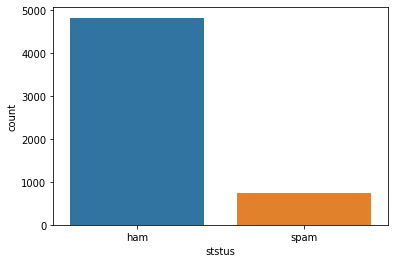

In [189]:
#Plotting the Target distribution
sns.countplot(data=df,x='ststus')

In [125]:
df.head()

,ststus,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [126]:
len(df)

5572

**spam occures in our data set**

In [127]:
len(df[df.ststus=="spam"])

747

replacing ham by 1 and spam by 0

In [128]:
df.loc[df["ststus"]=="ham","ststus"]=1
df.loc[df["ststus"]=="spam","ststus"]=0
df.head()

,ststus,message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [129]:
df_x =df['message ']
df_y=df["ststus"]

In [130]:
df_x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will 蘝 b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message , Length: 5572, dtype: object

# **no null values in df_x**

In [136]:
df_x.isna().sum()

0

# **data formating in lower case and removing special charactaristics**

In [137]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [140]:
df['ststus'] = df['message '].apply(clean_text)
df.head()

,ststus,message
0,go until jurong point crazy available only in ...,"Go until jurong point, crazy.. Available only ..."
1,ok lar joking wif u oni,Ok lar... Joking wif u oni...
2,free entry in a wkly comp to win fa cup final...,Free entry in 2 a wkly comp to win FA Cup fina...
3,u dun say so early hor u c already then say,U dun say so early hor... U c already then say...
4,nah i dont think he goes to usf he lives aroun...,"Nah I don't think he goes to usf, he lives aro..."


In [141]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **Vectorization**

# **The CountVectorizer will select the words/features/terms which occur the most frequently.**

**Vectorization is a technique by which you can make your code execute fast. It is a very interesting and important way to optimize algorithms when you are implementing it from scratch.**

Just like in the real-world we are interested in solving any kind of problem efficiently in such a way that the amount of error is reduced as much as possible.

In machine learning, there’s a concept of an optimization algorithm that tries to reduce the error and computes to get the best parameters for the machine learning model.

So by using a vectorized implementation in an optimization algorithm we can make the process of computation much faster compared to Unvectorized Implementation.

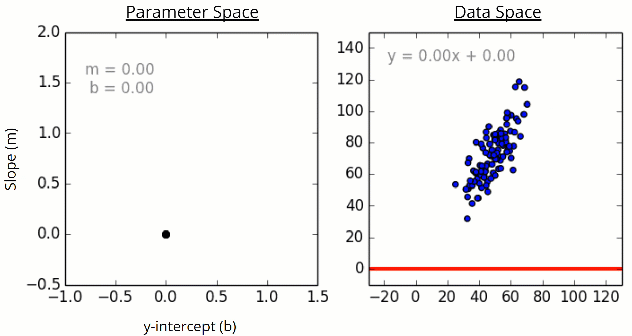

In [143]:
# how to define X and y (from the SMS data) for use with COUNTVECTORIZER
x = df['ststus']
y = df['message ']

print(len(x), len(y))

5572 5572


In [144]:
# Split into train and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

4179 4179
1393 1393


In [145]:
from sklearn.feature_extraction.text import CountVectorizer

In [146]:
# instantiate the vectorizer
cv = CountVectorizer()
cv.fit(x_train)

CountVectorizer()

In [147]:
# Use the trained to create a document-term matrix from train and test sets
x_train_dtm = cv.transform(x_train)
x_test_dtm = cv.transform(x_test)

In [148]:
vect_tunned = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.1, max_df=0.7, max_features=100)
vect_tunned

CountVectorizer(max_df=0.7, max_features=100, min_df=0.1, ngram_range=(1, 2),
                stop_words='english')

# ***TF-IDF ***

TF-IDF stands for term frequency-inverse document frequency and it is a measure, used in the fields of information retrieval (IR) and machine learning, that can quantify the importance or relevance of string representations (words, phrases, lemmas, etc)  in a document amongst a collection of documents (also known as a corpus).

# **Overview of TF-IDF**

TF-IDF can be broken down into two parts TF (term frequency) and IDF (inverse document frequency).

**What is TF (term frequency)?**

Term frequency works by looking at the frequency of a particular term you are concerned with relative to the document. There are multiple measures, or ways, of defining frequency:

**Number of times the word appears in a document (raw count).**

Term frequency adjusted for the length of the document (raw count of occurences divided by number of words in the document).
Logarithmically scaled frequency (e.g. log(1 + raw count)).
Boolean frequency (e.g. 1 if the term occurs, or 0 if the term does not occur, in the document).

**What is IDF (inverse document frequency)?**

Inverse document frequency looks at how common (or uncommon) a word is amongst the corpus. IDF is calculated as follows where t is the term (word) we are looking to measure the commonness of and N is the number of documents (d) in the corpus (D).. The denominator is simply the number of documents in which the term, t, appears in. 

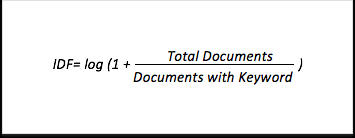

In [149]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()

tfidf_transformer.fit(x_train_dtm)
x_train_tfidf = tfidf_transformer.transform(x_train_dtm)

x_train_tfidf

<4179x6936 sparse matrix of type '<class 'numpy.float64'>'
	with 51701 stored elements in Compressed Sparse Row format>

# data modaling 

In [150]:
import plotly.figure_factory as ff

x_axes = ['Ham', 'Spam']
y_axes =  ['Spam', 'Ham']

def conf_matrix(z, x=x_axes, y=y_axes):
    
    z = np.flip(z, 0)

    # change each element of z to type string for annotations
    z_text = [[str(y) for y in x] for x in z]

    # set up figure 
    fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='Viridis')

    # add title
    fig.update_layout(title_text='<b>Confusion matrix</b>',
                      xaxis = dict(title='Predicted value'),
                      yaxis = dict(title='Real value')
                     )

    # add colorbar
    fig['data'][0]['showscale'] = True
    
    return fig

In [152]:
# Create a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

# Train the model
nb.fit(x_train_dtm, y_train)

MultinomialNB()

#  **Naive Bayes**

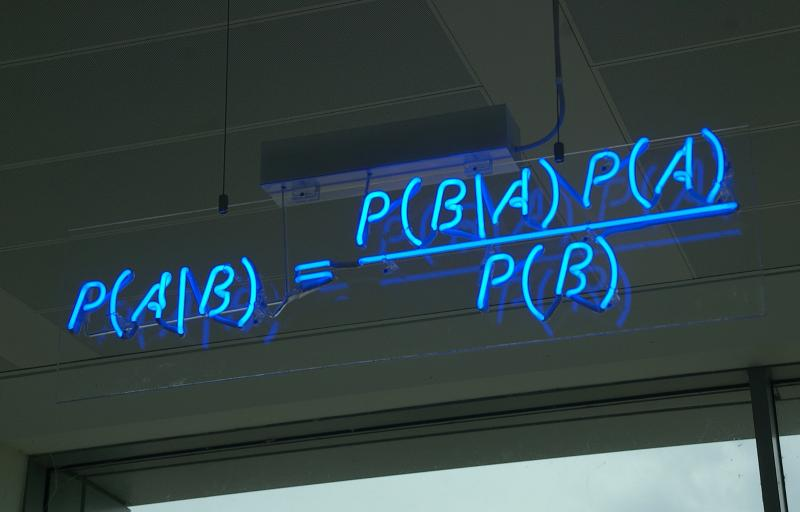


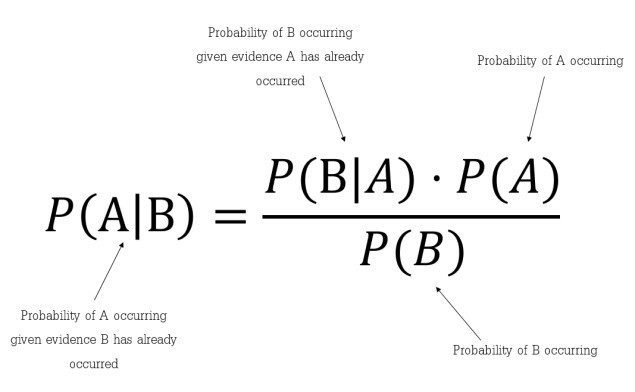
Naive Bayes is one of the simplest machine learning algorithms for classification. We'll cover an introduction to Naive Bayes, and implement it in Python.

Naive Bayes falls under the umbrella of supervised machine learning algorithms that are primarily used for classification. In this context, "supervised" tells us that the algorithm is trained with both input features and categorical outputs (i.e., the data includes the correct desired output for each point, which the algorithm should predict).

But why is the algorithm called "naive"? This is because the classifier assumes that the input features that go into the model are independent of each other. Hence, changing one input feature won’t affect any of the others. It's therefore naive in the sense that this assumption may or may not be true, and it most probably isn't.

**Below are a few use cases that employ Naive Bayes:**

**Real-time prediction:**
Naive Bayes is an eager learning classifier and is quite fast in its execution. Thus, it could be used for making predictions in real-time.

**Multi-class prediction**:
 The Naive Bayes algorithm is also well-known for multi-class prediction, or classifying instances into one of several different classes.

**Text classification/spam filtering/sentiment analysis**: When used to classify text, a Naive Bayes classifier often achieves a higher success rate than other algorithms due to its ability to perform well on multi-class problems while assuming independence. As a result, it is widely used in spam filtering (identifying spam email) and sentiment analysis (e.g. in social media, to identify positive and negative customer sentiments).

**Recommendation Systems**: A Naive Bayes Classifier can be used together with Collaborative Filtering to build a Recommendation System which could filter through new information and predict whether a user would like a given resource or not.

In [211]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
import sklearn.metrics as metrics

pipe = Pipeline([('bow', CountVectorizer()), 
                 ('tfid', TfidfTransformer()),  
                 ('model', MultinomialNB())])

In [ ]:
# Fit the pipeline with the data
pipe.fit(x_train, y_train)

y_pred_class = pipe.predict(x_test)

print(metrics.accuracy_score(y_test, y_pred_class))

conf_matrix(metrics.confusion_matrix(y_test, y_pred_class))

0.9583632447954056
